Importing libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import random

Connecting gdrive to this notebook to access dataset conveniently

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Setting up training and test sets

In [ ]:
X_train = np.loadtxt('/content/gdrive/MyDrive/CatvsDog/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/gdrive/MyDrive/CatvsDog/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/gdrive/MyDrive/CatvsDog/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/gdrive/MyDrive/CatvsDog/labels_test.csv', delimiter = ',')

Reshape and normalise the image data

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0   # -- normalise the values btwn 0 & 1
X_test = X_test/255.0

In [ ]:
# just checking

print("Shape_of X_train: ", X_train.shape)
print("Shape_of Y_train: ", Y_train.shape)

print("Shape_of X_test: ", X_test.shape)
print("Shape_of Y_test: ", Y_test.shape)

Shape_of X_train:  (2000, 100, 100, 3)
Shape_of Y_train:  (2000, 1)
Shape_of X_test:  (400, 100, 100, 3)
Shape_of Y_test:  (400, 1)


Test if we can access images

<function matplotlib.pyplot.show(close=None, block=None)>

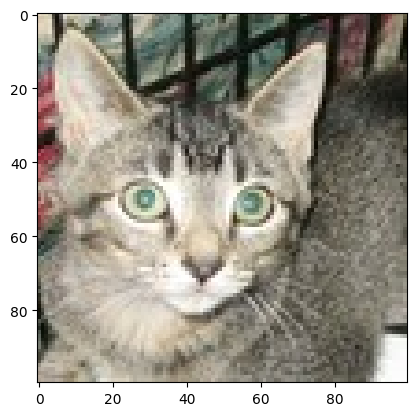

In [ ]:
ran_id = random.randint(0, len(X_train))
plt.imshow(X_train[ran_id, :])
plt.show

Model definition :

Layer_1 :

Conv2D layer with 32 filters and size of (3,3) to extract features from image, using ReLU activation. Input should be a 100x100 image with 3 color channels (RGB)

Layer_2 :

MaxPooling2D layer with a pool size of (2,2) to prevent overfitting by reducing dimensions while retaining features

Layer_3 : Again a similar Conv2D layer to extract features from the second layer's output.

Layer_4 : Another MaxPooling2D layer to downsample the output from Layer_3

Layer_5 : Since I'll be use a Dense layer to get the actual probabilities the matrices (or tensor) obtained from layer_4 needs to be flattened. Layer_5 does this outputting a 1D matrix to be giving to a Dense layer.

Layer_6 : A dense layer with 64 units, using the ReLU activation to learn non-linear relationships between the features extracted by the previous layers.

Layer_7 : This layer is used for binary classification, where the sigmoid activation outputs a probability of the input belonging to class 1(cat) or 0(dog).


In [ ]:
# MODELLING - sequential


model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

The model can also be defined as this, same thing

In [ ]:
# or maybe keep adding layers of a sequential?

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


#v this should work sort of same as the above one - but im not gonna use it



Compile and fit

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# The loss function used here is 'binary_crossentropy'
# used for binary classification by measuring dissimilarity between the predicted probabilities and the target


# The optimizer used is 'adam' : adaptive moment estimation
# a stochastic gradient descent algorithm that adapts the learning rate for each parameter based on the gradient history
# I previous used the regular way of choosing a learning manually

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 23s 669ms/step - loss: 0.7504 - accuracy: 0.5070
Epoch 2/5
32/32 [==============================] - 21s 664ms/step - loss: 0.6937 - accuracy: 0.5205
Epoch 3/5
32/32 [==============================] - 22s 677ms/step - loss: 0.6812 - accuracy: 0.6160
Epoch 4/5
32/32 [==============================] - 20s 638ms/step - loss: 0.6451 - accuracy: 0.6455
Epoch 5/5
32/32 [==============================] - 22s 704ms/step - loss: 0.6321 - accuracy: 0.6380


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 118ms/step - loss: 0.6293 - accuracy: 0.6450


[0.6293085813522339, 0.6449999809265137]

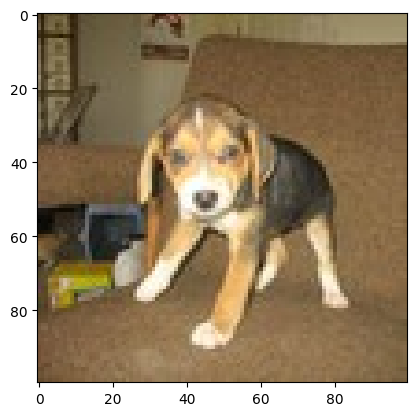

1/1 [==============================] - 0s 22ms/step
Image shows a  dog


In [ ]:
# predictions

rand_id = random.randint(0, len(Y_test))
plt.imshow(X_test[rand_id, :])
plt.show()

y_pred = model.predict(X_test[rand_id, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'

print('Image shows a ', pred)